In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import sys


In [124]:
df = pd.read_csv("D:/big data/practice/sasol_user_retention/Train.csv")

In [125]:
data_frame = df.copy()
data_frame.shape

(1507834, 19)

In [126]:
data_frame.head()

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,Target
0,ID_YEB05X4KUGPQ,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
1,ID_Z9IQ9QH52KVN,Nebula,K > 24 month,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,NaN,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,31.0,0
2,ID_YZSU7B7M35QS,Celestial,K > 24 month,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,NaN,1.0,NaN,NaN,NO,61,NaN,NaN,0
3,ID_QS4F5LEX29KM,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
4,ID_8IYIC9PFU8U1,Eclipsara,K > 24 month,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,NaN,NaN,NO,62,Mixt 250F=Unlimited_call24H,31.0,0


# EDA via Descriptive Statistics


In [127]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507834 entries, 0 to 1507833
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1507834 non-null  object 
 1   region            913743 non-null   object 
 2   tenure            1507834 non-null  object 
 3   Amount            978320 non-null   float64
 4   refill_frequency  978320 non-null   float64
 5   revenue           999713 non-null   float64
 6   arpu_segment      999713 non-null   float64
 7   frequency         999713 non-null   float64
 8   data_volume       766028 non-null   float64
 9   on_net            957192 non-null   float64
 10  Procuct_1         881271 non-null   float64
 11  Procuct_2         604784 non-null   float64
 12  zone1             118986 non-null   float64
 13  zone2             95505 non-null    float64
 14  mrg               1507834 non-null  object 
 15  regularity        1507834 non-null  int64  
 16  

In [128]:
data_frame.dtypes.sort_values(ascending=False)

ID                   object
tenure               object
top_pack             object
mrg                  object
region               object
Procuct_1           float64
freq_top_pack       float64
zone2               float64
zone1               float64
Procuct_2           float64
on_net              float64
data_volume         float64
frequency           float64
arpu_segment        float64
revenue             float64
refill_frequency    float64
Amount              float64
regularity            int64
Target                int64
dtype: object

In [129]:
from scipy import stats

In [130]:
# generate descriptive statistics for numerical variables
data_frame.describe()

# generate descriptive statistics for numerical and categorical variables
data_frame.describe(include = 'all')

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,Target
count,1507834,913743,1507834,978320.000000,978320.000000,999713.000000,999713.000000,999713.000000,7.660280e+05,957192.000000,881271.000000,604784.000000,118986.000000,95505.000000,1507834,1.507834e+06,876011,876011.000000,1.507834e+06
unique,1507834,14,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,130,NaN,NaN
top,ID_YEB05X4KUGPQ,Mandalore,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,All-net 500F=2000F;5d,NaN,NaN
freq,1,359443,1430080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1507834,NaN,222461,NaN,NaN
mean,NaN,NaN,NaN,2361.212767,11.521423,2352.073152,784.027307,13.967657,3.354667e+03,278.000929,95.325088,23.146017,8.092187,7.465515,NaN,2.804414e+01,NaN,9.263913,1.873648e-01
std,NaN,NaN,NaN,3028.954909,13.266779,3053.176864,1017.723634,14.682316,1.330460e+04,874.412483,203.328016,63.506893,40.739423,32.145740,NaN,2.228078e+01,NaN,12.268658,3.902042e-01
min,NaN,NaN,NaN,4.270000,1.000000,0.430000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000e+00,NaN,1.000000,0.000000e+00
25%,NaN,NaN,NaN,427.350000,2.000000,427.350000,142.310000,3.000000,0.000000e+00,5.000000,7.000000,2.000000,0.000000,0.000000,NaN,6.000000e+00,NaN,2.000000,0.000000e+00
50%,NaN,NaN,NaN,1282.050000,7.000000,1282.050000,427.350000,9.000000,2.560000e+02,27.000000,29.000000,6.000000,1.000000,2.000000,NaN,2.400000e+01,NaN,5.000000,0.000000e+00
75%,NaN,NaN,NaN,3141.030000,16.000000,3146.580000,1048.720000,20.000000,2.879000e+03,156.000000,99.000000,20.000000,3.000000,5.000000,NaN,5.100000e+01,NaN,12.000000,0.000000e+00


# EDA & Data Preparation


In [131]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507834 entries, 0 to 1507833
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1507834 non-null  object 
 1   region            913743 non-null   object 
 2   tenure            1507834 non-null  object 
 3   Amount            978320 non-null   float64
 4   refill_frequency  978320 non-null   float64
 5   revenue           999713 non-null   float64
 6   arpu_segment      999713 non-null   float64
 7   frequency         999713 non-null   float64
 8   data_volume       766028 non-null   float64
 9   on_net            957192 non-null   float64
 10  Procuct_1         881271 non-null   float64
 11  Procuct_2         604784 non-null   float64
 12  zone1             118986 non-null   float64
 13  zone2             95505 non-null    float64
 14  mrg               1507834 non-null  object 
 15  regularity        1507834 non-null  int64  
 16  

In [132]:
data_frame.dtypes.sort_values(ascending=False)

ID                   object
tenure               object
top_pack             object
mrg                  object
region               object
Procuct_1           float64
freq_top_pack       float64
zone2               float64
zone1               float64
Procuct_2           float64
on_net              float64
data_volume         float64
frequency           float64
arpu_segment        float64
revenue             float64
refill_frequency    float64
Amount              float64
regularity            int64
Target                int64
dtype: object

In [133]:
data_frame['Target'].describe()

count    1.507834e+06
mean     1.873648e-01
std      3.902042e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Target, dtype: float64

In [134]:
data_frame['top_pack'].describe()

count                    876011
unique                      130
top       All-net 500F=2000F;5d
freq                     222461
Name: top_pack, dtype: object

In [135]:
data_frame.drop_duplicates().shape

(1507834, 19)

Data Cleaning

In [136]:
data_frame = data_frame.drop(['ID', 'mrg'], axis=1)

In [137]:
# Assuming your DataFrame is named df
data_frame['tenure_letter'] = data_frame['tenure'].str.extract('([A-Z])')
data_frame['tenure_months'] = data_frame['tenure'].str.extract('(\d+)').astype(float)

# Drop the original 'tenure' column if needed
data_frame = data_frame.drop('tenure', axis=1)

In [138]:
data_frame.shape

(1507834, 18)

In [139]:
mode_value = data_frame['region'].mode().iloc[0]
data_frame['region'].fillna(mode_value, inplace=True)
data_frame.shape

(1507834, 18)

In [140]:
data_frame.head()

,region,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,top_pack,freq_top_pack,Target,tenure_letter,tenure_months
0,Mandalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,0,K,24.0
1,Nebula,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,NaN,NaN,NaN,62,On net 200F=Unlimited _call24H,31.0,0,K,24.0
2,Celestial,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,NaN,1.0,NaN,NaN,61,NaN,NaN,0,K,24.0
3,Mandalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,0,K,24.0
4,Eclipsara,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,NaN,NaN,62,Mixt 250F=Unlimited_call24H,31.0,0,K,24.0


In [141]:
data_frame = data_frame.fillna('')

In [142]:
data_frame.drop(data_frame[data_frame["revenue"] == ''].index, inplace=True)

In [143]:
data_frame.drop(data_frame[data_frame["tenure_letter"] == ''].index, inplace=True)
data_frame.shape

(999713, 18)

In [144]:
data_frame.head(10)

,region,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,top_pack,freq_top_pack,Target,tenure_letter,tenure_months
1,Nebula,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,,,,62,On net 200F=Unlimited _call24H,31.0,0,K,24.0
2,Celestial,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,,1.0,,,61,,,0,K,24.0
4,Eclipsara,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,,,62,Mixt 250F=Unlimited_call24H,31.0,0,K,24.0
5,Celestial,42.74,1.0,42.74,14.1,2.0,4.0,3.0,,,,,44,,,0,K,24.0
7,Eclipsara,2564.1,12.0,2777.78,926.07,13.0,,96.0,96.0,1.0,,,59,All-net 500F =2000F_AllNet_Unlimited,13.0,0,K,24.0
9,Mandalore,1987.18,13.0,2242.74,747.44,13.0,,9.0,39.0,73.0,,,34,All-net 500F=2000F;5d,8.0,0,K,24.0
11,Celestial,85.47,1.0,85.47,28.63,3.0,0.0,7.0,1.0,,,,30,IVR Echat_Daily_50F,1.0,0,K,24.0
14,Droidika,1837.61,9.0,1837.18,612.39,10.0,0.0,61.0,3.0,19.0,,,48,All-net 500F=2000F;5d,8.0,0,I,18.0
15,Luminous,1495.73,1.0,1495.73,498.72,1.0,2056.0,,18.0,2.0,,,9,All-net 500F=2000F;5d,1.0,0,K,24.0
16,Mandalore,2948.72,18.0,3076.92,1025.64,24.0,0.0,482.0,200.0,,,,59,On net 200F=Unlimited _call24H,10.0,0,K,24.0


In [145]:
# calculate the no. of churned vs. retained
print(data_frame['Target'].value_counts())

# calculate the proportion
print(data_frame['Target'].value_counts(normalize=True)*100)

Target
0    945773
1     53940
Name: count, dtype: int64
Target
0    94.604451
1     5.395549
Name: proportion, dtype: float64


# Data Preprocessing for model

In [146]:
cleaned_df = data_frame.copy()

In [147]:
cleaned_df.shape

(999713, 18)

In [148]:
cleaned_df.dtypes

region               object
Amount               object
refill_frequency     object
revenue              object
arpu_segment         object
frequency            object
data_volume          object
on_net               object
Procuct_1            object
Procuct_2            object
zone1                object
zone2                object
regularity            int64
top_pack             object
freq_top_pack        object
Target                int64
tenure_letter        object
tenure_months       float64
dtype: object

In [149]:
cleaned_df

,region,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,top_pack,freq_top_pack,Target,tenure_letter,tenure_months
1,Nebula,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,,,,62,On net 200F=Unlimited _call24H,31.0,0,K,24.0
2,Celestial,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,,1.0,,,61,,,0,K,24.0
4,Eclipsara,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,,,62,Mixt 250F=Unlimited_call24H,31.0,0,K,24.0
5,Celestial,42.74,1.0,42.74,14.1,2.0,4.0,3.0,,,,,44,,,0,K,24.0
7,Eclipsara,2564.1,12.0,2777.78,926.07,13.0,,96.0,96.0,1.0,,,59,All-net 500F =2000F_AllNet_Unlimited,13.0,0,K,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507825,Mandalore,85.47,2.0,81.62,27.35,3.0,121.0,8.0,,,,,20,,,0,K,24.0
1507827,Mandalore,3824.79,19.0,3825.64,1275.21,25.0,15088.0,14.0,28.0,5.0,,,42,"Data:490F=1GB,7d",13.0,0,K,24.0
1507829,Mandalore,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,,11.0,0.0,61.0,41,"Data:490F=1GB,7d",4.0,0,K,24.0
1507830,Celestial,854.7,2.0,854.7,285.04,2.0,2276.0,0.0,,,,,36,"Data:1000F=2GB,30d",2.0,0,K,24.0


In [150]:
columns_to_convert = ['Amount', 'refill_frequency', 'revenue', 'arpu_segment', 'frequency',
                       'data_volume', 'on_net', 'Procuct_1', 'Procuct_2','zone1', 'zone2',
                       'freq_top_pack']

cleaned_df[columns_to_convert] = cleaned_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [151]:
cleaned_df.dtypes

region               object
Amount              float64
refill_frequency    float64
revenue             float64
arpu_segment        float64
frequency           float64
data_volume         float64
on_net              float64
Procuct_1           float64
Procuct_2           float64
zone1               float64
zone2               float64
regularity            int64
top_pack             object
freq_top_pack       float64
Target                int64
tenure_letter        object
tenure_months       float64
dtype: object

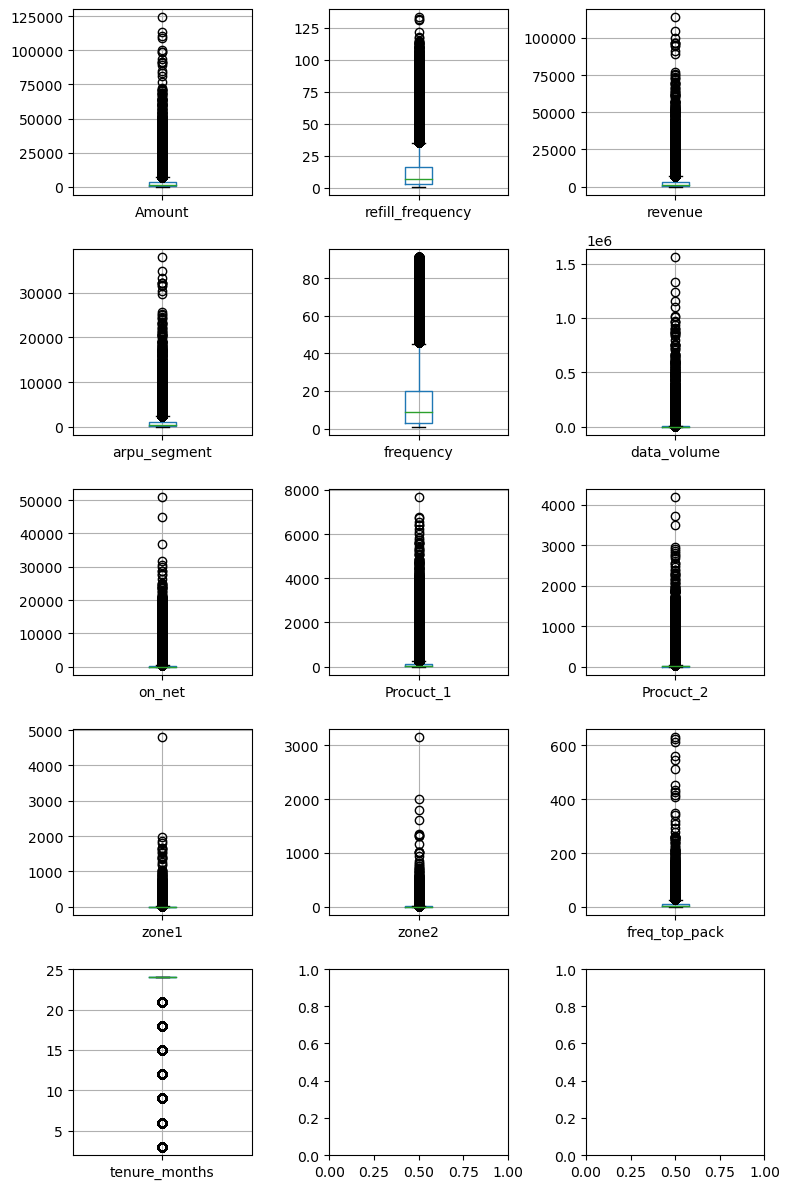

In [152]:
# List of numeric features for visualization
numeric = ['Amount', 'refill_frequency', 'revenue', 'arpu_segment', 'frequency',
           'data_volume', 'on_net', 'Procuct_1', 'Procuct_2','zone1', 'zone2', 'freq_top_pack', 'tenure_months']
# Calculating the number of plots and the number of rows and columns for the subplots
num_plots = len(numeric)
num_rows = (num_plots + 2) // 3
num_cols = min(num_plots, 3)

# Creating subplots based on the calculated number of rows and columns
# Setting the size of the figure as 8 inches by 12 inches
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12))
axes = axes.flatten()

# Iterating over the numeric features for creating box plots
for i, feat in enumerate(numeric):
    # Creating a box plot for the current feature and assigning it to the corresponding subplot
    cleaned_df[[feat]].boxplot(ax=axes[i])

# Adjusting the layout of the figure for better visualization
fig.tight_layout()

# Displaying the visualizations
plt.show()

In [153]:
cleaned_df['Target'].value_counts()

Target
0    945773
1     53940
Name: count, dtype: int64

In [154]:
cleaned_df.isnull().sum()

region                   0
Amount               36976
refill_frequency     36976
revenue                  0
arpu_segment             0
frequency                0
data_volume         336734
on_net              121620
Procuct_1           128616
Procuct_2           399510
zone1               885064
zone2               904481
regularity               0
top_pack                 0
freq_top_pack       123752
Target                   0
tenure_letter            0
tenure_months            0
dtype: int64

In [155]:
# Replace missing values with the mean of each column
cleaned_df['Amount'].fillna(cleaned_df['Amount'].mean(), inplace=True)
cleaned_df['refill_frequency'].fillna(cleaned_df['refill_frequency'].mean(), inplace=True)
cleaned_df['data_volume'].fillna(cleaned_df['data_volume'].mean(), inplace=True)
cleaned_df['on_net'].fillna(cleaned_df['on_net'].mean(), inplace=True)
cleaned_df['Procuct_1'].fillna(cleaned_df['Procuct_1'].mean(), inplace=True)
cleaned_df['Procuct_2'].fillna(cleaned_df['Procuct_2'].mean(), inplace=True)
cleaned_df['zone1'].fillna(cleaned_df['zone1'].mean(), inplace=True)
cleaned_df['zone2'].fillna(cleaned_df['zone2'].mean(), inplace=True)
cleaned_df['freq_top_pack'].fillna(cleaned_df['freq_top_pack'].mean(), inplace=True)

cleaned_df['revenue'].fillna(cleaned_df['revenue'].mean(), inplace=True)
cleaned_df['arpu_segment'].fillna(cleaned_df['arpu_segment'].mean(), inplace=True)
cleaned_df['frequency'].fillna(cleaned_df['frequency'].mean(), inplace=True)

In [156]:

# Calculate the mode excluding NaN values
mode_value = cleaned_df['top_pack'].mode().iloc[0]

# Replace NaN values with mode_value
cleaned_df['top_pack'].fillna(mode_value, inplace=True)

# Replace empty strings with mode_value
cleaned_df['top_pack'].replace('', mode_value, inplace=True)


In [157]:
mode_value = cleaned_df['region'].mode().iloc[0]
cleaned_df['region'].fillna(mode_value, inplace=True)

In [158]:
cleaned_df.isnull().sum()

region              0
Amount              0
refill_frequency    0
revenue             0
arpu_segment        0
frequency           0
data_volume         0
on_net              0
Procuct_1           0
Procuct_2           0
zone1               0
zone2               0
regularity          0
top_pack            0
freq_top_pack       0
Target              0
tenure_letter       0
tenure_months       0
dtype: int64

In [159]:
cleaned_df.head(70)

,region,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,top_pack,freq_top_pack,Target,tenure_letter,tenure_months
1,Nebula,4764.960000,41.000000,4756.84,1585.47,41.0,2.000000,626.000000,24.000000,23.221054,8.280709,7.410408,62,On net 200F=Unlimited _call24H,31.000000,0,K,24.0
2,Celestial,5769.230000,22.000000,5769.23,1923.08,22.0,28121.000000,0.000000,95.902849,1.000000,8.280709,7.410408,61,All-net 500F=2000F;5d,9.264383,0,K,24.0
4,Eclipsara,5341.880000,58.000000,5636.75,1879.06,60.0,1131.000000,546.000000,376.000000,0.000000,8.280709,7.410408,62,Mixt 250F=Unlimited_call24H,31.000000,0,K,24.0
5,Celestial,42.740000,1.000000,42.74,14.10,2.0,4.000000,3.000000,95.902849,23.221054,8.280709,7.410408,44,All-net 500F=2000F;5d,9.264383,0,K,24.0
7,Eclipsara,2564.100000,12.000000,2777.78,926.07,13.0,3796.157635,96.000000,96.000000,1.000000,8.280709,7.410408,59,All-net 500F =2000F_AllNet_Unlimited,13.000000,0,K,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Mandalore,2395.987826,11.690497,0.43,0.00,1.0,1.000000,57.000000,0.000000,23.221054,8.280709,7.410408,23,All-net 500F=2000F;5d,9.264383,0,K,24.0
101,Mandalore,213.680000,1.000000,213.25,70.94,2.0,3796.157635,8.000000,7.000000,1.000000,8.280709,7.410408,49,All-net 500F=2000F;5d,9.264383,0,K,24.0
102,Droidika,213.680000,1.000000,213.68,71.37,1.0,3796.157635,19.000000,16.000000,3.000000,8.280709,7.410408,10,All-net 500F=2000F;5d,1.000000,0,K,24.0
103,Mandalore,2395.987826,11.690497,6.41,2.14,1.0,3796.157635,301.475766,95.902849,23.221054,8.280709,7.410408,1,All-net 500F=2000F;5d,9.264383,1,K,24.0


Task: Visualize data using matplotlib

In [160]:
# calculate the no. of Android vs. iPhone users
df_bar_plot = cleaned_df['Target'].value_counts()
print(df_bar_plot)

Target
0    945773
1     53940
Name: count, dtype: int64


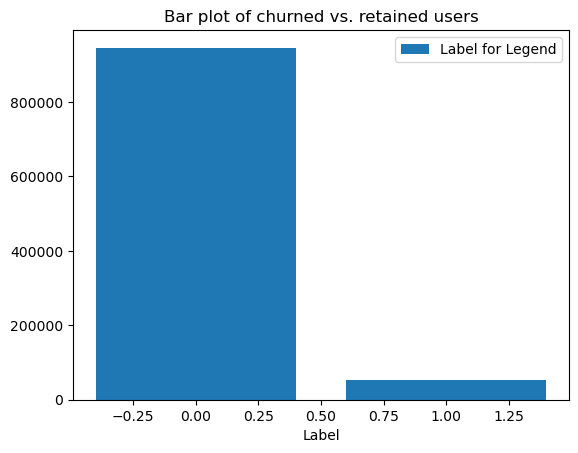

In [161]:

# Assuming df_bar_plot is a pandas DataFrame with the index and values you want to plot
plt.bar(df_bar_plot.index, df_bar_plot, label='Label for Legend')  # Replace 'column_name' and 'Label for Legend' with actual values
plt.title("Bar plot of churned vs. retained users")
plt.xlabel("Label")

plt.legend()
plt.show()

In [162]:
# calculate the no. of churned vs. retained
print(cleaned_df['Target'].value_counts())

# calculate the proportion
print(cleaned_df['Target'].value_counts(normalize=True)*100)

Target
0    945773
1     53940
Name: count, dtype: int64
Target
0    94.604451
1     5.395549
Name: proportion, dtype: float64


In [163]:
import pandas as pd
from sklearn.utils import resample

target_class = 1  # Change this to the class you want to balance
oversample_percentage = 90  # Change this to the desired oversampling percentage

# Separate the majority and minority classes
majority_class = cleaned_df[cleaned_df['Target'] != target_class]
minority_class = cleaned_df[cleaned_df['Target'] == target_class]

# Calculate the desired number of samples for the minority class based on the oversample percentage
oversample_factor = oversample_percentage / 100
desired_samples = int(len(majority_class) * oversample_factor)

# Oversample the minority class
oversampled_minority = resample(minority_class, replace=True, n_samples=desired_samples, random_state=42)

# Undersample the majority class
undersampled_majority = resample(majority_class, replace=False, n_samples=desired_samples, random_state=42)

# Combine the oversampled minority class with the undersampled majority class
balanced_df = pd.concat([undersampled_majority, oversampled_minority])

# Shuffle the DataFrame to randomize the order of samples
cleaned_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [164]:
# calculate the no. of Android vs. iPhone users
df_bar_plot = cleaned_df['Target'].value_counts()
print(df_bar_plot)

Target
1    851195
0    851195
Name: count, dtype: int64


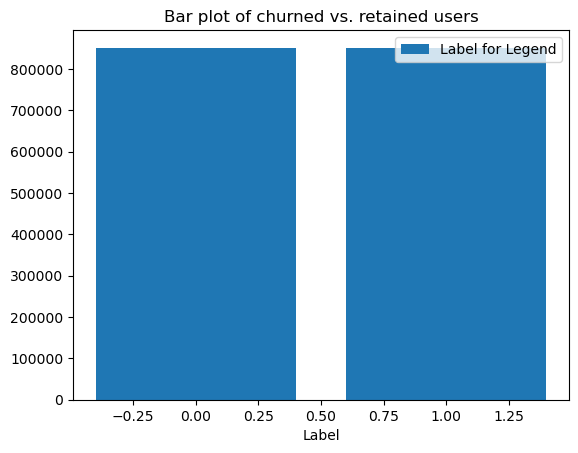

In [165]:

# Assuming df_bar_plot is a pandas DataFrame with the index and values you want to plot
plt.bar(df_bar_plot.index, df_bar_plot, label='Label for Legend')  # Replace 'column_name' and 'Label for Legend' with actual values
plt.title("Bar plot of churned vs. retained users")
plt.xlabel("Label")

plt.legend()
plt.show()

Task 2: Perform feature engineering

In [166]:
final_df = cleaned_df.copy()

In [167]:
final_df.isnull().sum()

region              0
Amount              0
refill_frequency    0
revenue             0
arpu_segment        0
frequency           0
data_volume         0
on_net              0
Procuct_1           0
Procuct_2           0
zone1               0
zone2               0
regularity          0
top_pack            0
freq_top_pack       0
Target              0
tenure_letter       0
tenure_months       0
dtype: int64

In [168]:
final_df

,region,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,top_pack,freq_top_pack,Target,tenure_letter,tenure_months
0,Mandalore,128.210000,2.000000,125.21,41.88,3.0,823.000000,1.000000,1.000000,23.221054,8.280709,7.410408,3,VAS(IVR_Radio_Daily),3.000000,1,K,24.0
1,Mandalore,2564.100000,2.000000,4701.28,1567.09,6.0,224.000000,1147.000000,382.000000,45.000000,7.000000,7.410408,61,All-net 500F=2000F;5d,4.000000,0,K,24.0
2,Droidika,213.680000,1.000000,213.68,71.37,1.0,3796.157635,301.475766,34.000000,23.221054,8.280709,7.410408,2,All-net 500F=2000F;5d,1.000000,0,K,24.0
3,Mandalore,769.230000,4.000000,743.16,247.86,6.0,1583.000000,21.000000,5.000000,12.000000,8.280709,7.410408,24,"Data:490F=1GB,7d",1.000000,1,K,24.0
4,Mandalore,5769.230000,41.000000,6030.77,2010.26,49.0,8828.000000,4.000000,36.000000,23.221054,8.280709,9.000000,60,"Data:200F=Unlimited,24H",24.000000,0,K,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702385,Mandalore,85.470000,1.000000,42.74,14.10,1.0,908.000000,4.000000,95.902849,23.221054,8.280709,7.410408,11,"Data: 100 F=40MB,24H",1.000000,0,K,24.0
1702386,Mandalore,2395.987826,11.690497,8.55,2.99,1.0,3796.157635,301.475766,95.902849,23.221054,8.280709,7.410408,9,All-net 500F=2000F;5d,9.264383,1,K,24.0
1702387,Mandalore,1367.520000,9.000000,1367.52,455.98,9.0,599.000000,13.000000,93.000000,23.221054,8.280709,7.410408,29,"Data: 100 F=40MB,24H",6.000000,0,K,24.0
1702388,Droidika,85.470000,1.000000,85.47,28.63,1.0,3796.157635,10.000000,8.000000,23.221054,8.280709,7.410408,22,On net 200F=Unlimited _call24H,1.000000,0,K,24.0


In [169]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Assuming your DataFrame is named df
le = LabelEncoder()

# Enumerate 'tenure_letter' column
final_df['tenure_letter'] = le.fit_transform(final_df['tenure_letter'])

# Enumerate 'region' column
final_df['region'] = le.fit_transform(final_df['region'])

# Enumerate 'region' column
final_df['top_pack'] = le.fit_transform(final_df['top_pack'])


In [170]:

final_df['revenue_tenure_interaction'] = final_df['revenue'] * final_df['tenure_months']

final_df.loc[final_df['revenue_tenure_interaction']==np.inf, 'revenue_tenure_interaction'] = 0


In [171]:
final_df['refill_regular_interaction'] = final_df['refill_frequency'] * final_df['regularity']

final_df.loc[final_df['refill_regular_interaction']==np.inf, 'refill_regular_interaction'] = 0

In [172]:
# Create a new feature indicating the ratio of on-net calls to total calls
final_df['on_net_ratio'] = final_df['on_net'] / (final_df['Procuct_1'] + final_df['Procuct_2'] + final_df['zone1'] + final_df['zone2'])

final_df.loc[final_df['on_net_ratio']==np.inf, 'on_net_ratio'] = 0

In [173]:
final_df['data_volume_ratio'] = final_df['data_volume'] / (final_df['Procuct_1'] + final_df['Procuct_2'] + final_df['zone1'] + final_df['zone2'])

final_df.loc[final_df['data_volume_ratio']==np.inf, 'data_volume_ratio'] = 0

In [174]:
threshold = 0.5

# Create binary indicators based on on_net_ratio and data_volume_ratio
final_df['high_ratio'] = (final_df['on_net_ratio'] > threshold) | (final_df['data_volume_ratio'] > threshold)


In [175]:
final_df = final_df.replace({True: 1, False: 0})

In [176]:
final_df

,region,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,...,top_pack,freq_top_pack,Target,tenure_letter,tenure_months,revenue_tenure_interaction,refill_regular_interaction,on_net_ratio,data_volume_ratio,high_ratio
0,7,128.210000,2.000000,125.21,41.88,3.0,823.000000,1.000000,1.000000,23.221054,...,115,3.000000,1,7,24.0,3005.04,6.000000,0.025055,20.620277,1
1,7,2564.100000,2.000000,4701.28,1567.09,6.0,224.000000,1147.000000,382.000000,45.000000,...,16,4.000000,0,7,24.0,112830.72,122.000000,2.598489,0.507464,1
2,2,213.680000,1.000000,213.68,71.37,1.0,3796.157635,301.475766,34.000000,23.221054,...,16,1.000000,0,7,24.0,5128.32,2.000000,4.134780,52.064801,1
3,7,769.230000,4.000000,743.16,247.86,6.0,1583.000000,21.000000,5.000000,12.000000,...,40,1.000000,1,7,24.0,17835.84,96.000000,0.642376,48.422940,1
4,7,5769.230000,41.000000,6030.77,2010.26,49.0,8828.000000,4.000000,36.000000,23.221054,...,36,24.000000,0,7,24.0,144738.48,2460.000000,0.052286,115.396034,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702385,7,85.470000,1.000000,42.74,14.10,1.0,908.000000,4.000000,95.902849,23.221054,...,26,1.000000,0,7,24.0,1025.76,11.000000,0.029670,6.735155,1
1702386,7,2395.987826,11.690497,8.55,2.99,1.0,3796.157635,301.475766,95.902849,23.221054,...,16,9.264383,1,7,24.0,205.20,105.214473,2.236218,28.158269,1
1702387,7,1367.520000,9.000000,1367.52,455.98,9.0,599.000000,13.000000,93.000000,23.221054,...,26,6.000000,0,7,24.0,32820.48,261.000000,0.098550,4.540900,1
1702388,2,85.470000,1.000000,85.47,28.63,1.0,3796.157635,10.000000,8.000000,23.221054,...,97,1.000000,0,7,24.0,2051.28,22.000000,0.213164,80.920528,1


In [177]:
final_df.isnull().sum()

region                        0
Amount                        0
refill_frequency              0
revenue                       0
arpu_segment                  0
frequency                     0
data_volume                   0
on_net                        0
Procuct_1                     0
Procuct_2                     0
zone1                         0
zone2                         0
regularity                    0
top_pack                      0
freq_top_pack                 0
Target                        0
tenure_letter                 0
tenure_months                 0
revenue_tenure_interaction    0
refill_regular_interaction    0
on_net_ratio                  2
data_volume_ratio             0
high_ratio                    0
dtype: int64

In [178]:
final_df['on_net_ratio'].fillna(final_df['on_net_ratio'].mean(), inplace=True)

In [179]:
final_df.isnull().sum()

region                        0
Amount                        0
refill_frequency              0
revenue                       0
arpu_segment                  0
frequency                     0
data_volume                   0
on_net                        0
Procuct_1                     0
Procuct_2                     0
zone1                         0
zone2                         0
regularity                    0
top_pack                      0
freq_top_pack                 0
Target                        0
tenure_letter                 0
tenure_months                 0
revenue_tenure_interaction    0
refill_regular_interaction    0
on_net_ratio                  0
data_volume_ratio             0
high_ratio                    0
dtype: int64

# Build Models


In [180]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir
from tensorflow.keras.models import Sequential

%matplotlib inline

In [181]:
X = final_df.drop("Target", axis=1)

y = final_df["Target"]

In [182]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702390 entries, 0 to 1702389
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   region                      int32  
 1   Amount                      float64
 2   refill_frequency            float64
 3   revenue                     float64
 4   arpu_segment                float64
 5   frequency                   float64
 6   data_volume                 float64
 7   on_net                      float64
 8   Procuct_1                   float64
 9   Procuct_2                   float64
 10  zone1                       float64
 11  zone2                       float64
 12  regularity                  int64  
 13  top_pack                    int32  
 14  freq_top_pack               float64
 15  tenure_letter               int32  
 16  tenure_months               float64
 17  revenue_tenure_interaction  float64
 18  refill_regular_interaction  float64
 19  on_net_ratio         

In [183]:
cols_to_scale = ['Amount', 'refill_frequency', 'revenue', 'arpu_segment', 'frequency',
                       'data_volume', 'on_net', 'Procuct_1', 'Procuct_2', 'zone1', 'zone2',
                       'freq_top_pack', 'revenue_tenure_interaction', 'refill_regular_interaction', 'on_net_ratio', 'data_volume_ratio' ]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [184]:
X

,region,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,...,regularity,top_pack,freq_top_pack,tenure_letter,tenure_months,revenue_tenure_interaction,refill_regular_interaction,on_net_ratio,data_volume_ratio,high_ratio
0,7,0.000998,0.007576,0.001097,0.001105,0.022222,0.000529,0.000020,0.000131,0.005563,...,3,115,0.003185,7,24.0,0.001099,0.000606,0.000020,0.001149,1
1,7,0.020620,0.007576,0.041346,0.041349,0.055556,0.000144,0.022575,0.049869,0.010781,...,61,16,0.004777,7,24.0,0.041348,0.014676,0.002039,0.000028,1
2,2,0.001687,0.000000,0.001876,0.001883,0.000000,0.002438,0.005934,0.004439,0.005563,...,2,16,0.000000,7,24.0,0.001878,0.000121,0.003244,0.002901,1
3,7,0.006162,0.022727,0.006533,0.006540,0.055556,0.001017,0.000413,0.000653,0.002875,...,24,40,0.000000,7,24.0,0.006534,0.011522,0.000504,0.002698,1
4,7,0.046439,0.303030,0.053039,0.053043,0.533333,0.005671,0.000079,0.004700,0.005563,...,60,36,0.036624,7,24.0,0.053041,0.298241,0.000041,0.006430,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702385,7,0.000654,0.000000,0.000372,0.000372,0.000000,0.000583,0.000079,0.012520,0.005563,...,11,26,0.000000,7,24.0,0.000374,0.001213,0.000023,0.000375,1
1702386,7,0.019266,0.080989,0.000071,0.000079,0.000000,0.002438,0.005934,0.012520,0.005563,...,9,16,0.013160,7,24.0,0.000073,0.012640,0.001755,0.001569,1
1702387,7,0.010981,0.060606,0.012024,0.012032,0.088889,0.000385,0.000256,0.012141,0.005563,...,29,26,0.007962,7,24.0,0.012026,0.031534,0.000077,0.000253,1
1702388,2,0.000654,0.000000,0.000748,0.000755,0.000000,0.002438,0.000197,0.001044,0.005563,...,22,97,0.000000,7,24.0,0.000750,0.002547,0.000167,0.004509,1


In [185]:
y.shape

(1702390,)

In [207]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 15
pca_data = pca.fit_transform(X)
pca_data.shape

(1702390, 15)

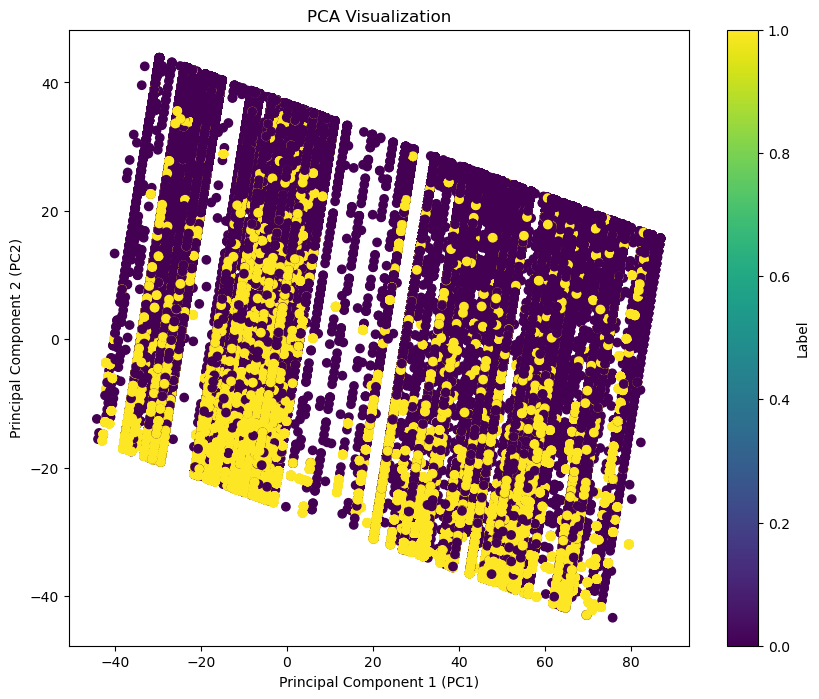

In [208]:
import matplotlib.pyplot as plt

# Assuming pca_data is a NumPy array with the principal components and y is the labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c=y, cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(scatter, label='Label')
plt.show()


In [188]:
def split_data(X, y, test_size=0.2):

    """
    Splits data into training, development and test sets.
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    Returns:
        X_train: A numpy array with shape = (#_train_examples, image_width, image_height, #_channels)
        y_train: A numpy array with shape = (#_train_examples, 1)
        X_val: A numpy array with shape = (#_val_examples, image_width, image_height, #_channels)
        y_val: A numpy array with shape = (#_val_examples, 1)
        X_test: A numpy array with shape = (#_test_examples, image_width, image_height, #_channels)
        y_test: A numpy array with shape = (#_test_examples, 1)
    """

    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [189]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(pca_data, y, test_size=0.3)


In [190]:
X_train.shape

(1191673, 22)

In [191]:
y_train.shape

(1191673,)

In [192]:
X_val.shape

(255359, 22)

In [193]:
X_val.shape

(255359, 22)

In [209]:
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(26, input_shape=(22,), activation='relu',
                 kernel_regularizer=keras.regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dense(15, activation='relu',
                 kernel_regularizer=keras.regularizers.l2(1e-4),),
     


    layers.Dense(1, activation='sigmoid')
])


In [210]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
model.summary()

cp1 = ModelCheckpoint('model1/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 26)                598       
                                                                 
 batch_normalization_5 (Bat  (None, 26)                104       
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 15)                405       
                                                                 
 dense_17 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1123 (4.39 KB)
Trainable params: 1071 (4.18 KB)
Non-trainable params: 52 (208.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime


num_epochs = 100
num_batch_size = 32

# Define the EarlyStopping  
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

# Reduce learning rate on plateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=3, min_lr=2e-8)

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, y_train,
          epochs=num_epochs,
          batch_size=num_batch_size, 
          validation_data=(X_val, y_val),
          callbacks=[checkpointer, reduce_lr, early_stopping],
          verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
37239/37240 [============================>.] - ETA: 0s - loss: 0.1320 - root_mean_squared_error: 0.3614
Epoch 1: val_loss improved from inf to 0.13016, saving model to saved_models\audio_classification.hdf5
37240/37240 [==============================] - 142s 4ms/step - loss: 0.1320 - root_mean_squared_error: 0.3614 - val_loss: 0.1302 - val_root_mean_squared_error: 0.3589 - lr: 1.0000e-04
Epoch 2/100
   70/37240 [..............................] - ETA: 1:23 - loss: 0.1395 - root_mean_squared_error: 0.3717

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



37240/37240 [==============================] - ETA: 0s - loss: 0.1313 - root_mean_squared_error: 0.3606
Epoch 2: val_loss improved from 0.13016 to 0.12949, saving model to saved_models\audio_classification.hdf5
37240/37240 [==============================] - 149s 4ms/step - loss: 0.1313 - root_mean_squared_error: 0.3606 - val_loss: 0.1295 - val_root_mean_squared_error: 0.3581 - lr: 1.0000e-04
Epoch 3/100
37240/37240 [==============================] - ETA: 0s - loss: 0.1309 - root_mean_squared_error: 0.3602
Epoch 3: val_loss improved from 0.12949 to 0.12943, saving model to saved_models\audio_classification.hdf5
37240/37240 [==============================] - 156s 4ms/step - loss: 0.1309 - root_mean_squared_error: 0.3602 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3581 - lr: 1.0000e-04
Epoch 4/100
37235/37240 [============================>.] - ETA: 0s - loss: 0.1306 - root_mean_squared_error: 0.3598
Epoch 4: val_loss improved from 0.12943 to 0.12895, saving model to saved_models\a

In [197]:
history = model.history()


In [198]:
for key in history.keys():
    print(key)

loss
accuracy


In [96]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()


    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()


In [97]:
plot_metrics(history)

KeyError: 'loss'

# testing

In [199]:
loss, acc =model.evaluate(X_test,y_test,verbose=0)
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.40168607234954834
Test Accuracy = 0.818952202796936


In [213]:
predictions =model.predict(X_test)
predictions[:5]

7980/7980 [==============================] - 18s 2ms/step


array([[0.58824223],
       [0.82651526],
       [0.92355853],
       [0.00381807],
       [0.32663643]], dtype=float32)

In [214]:
y_pred = []
for element in predictions:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [215]:
y_pred[:20]


[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]

In [216]:
y_test[:20]


1543765    1
230171     1
719541     1
1661615    0
1611695    0
1091063    1
62942      1
1376539    0
151906     0
1131859    0
1132116    0
1134915    1
414897     1
866189     1
926225     0
18615      0
250658     1
385603     1
1673660    0
415090     1
Name: Target, dtype: int64

In [217]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81    127697
           1       0.80      0.85      0.82    127661

    accuracy                           0.82    255358
   macro avg       0.82      0.82      0.82    255358
weighted avg       0.82      0.82      0.82    255358



Text(95.72222222222221, 0.5, 'Truth')

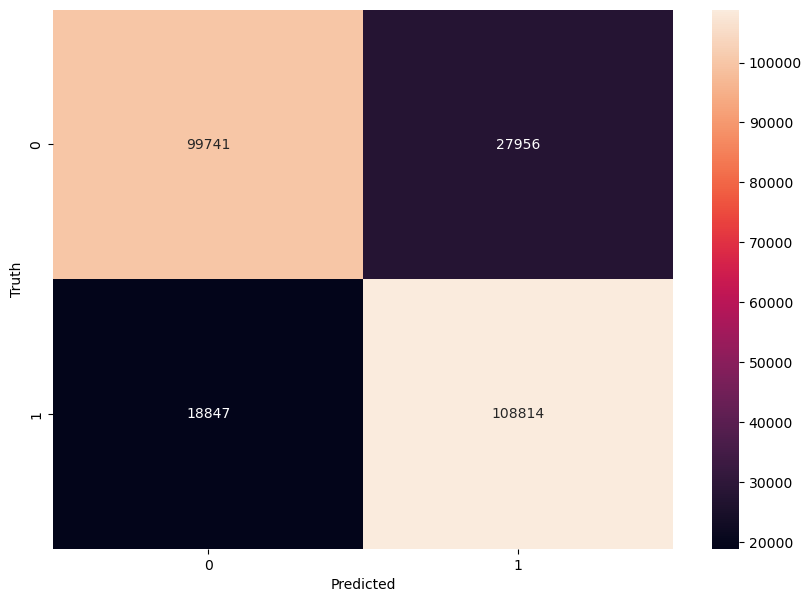

In [218]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# saving

In [206]:
import datetime

# Get the current date and time as a string
current_time = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

# Construct the filename with the current time
model_name = f"D:/big data/practice/sasol_user_retention/model_{current_time}.h5"

# Save the model with the filename
model.save(model_name)


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

